In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/cell_samples.csv')
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [ ]:

df.count()


ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [ ]:
df.shape

(699, 11)

In [ ]:
df.size

7689

In [ ]:
df['SingEpiSize'].value_counts()

2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: SingEpiSize, dtype: int64

In [ ]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [ ]:
benign_df=df[df['Class']==2][0:200]
maligant_df=df[df['Class']==4][0:200]


In [ ]:
help(benign_df.plot)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


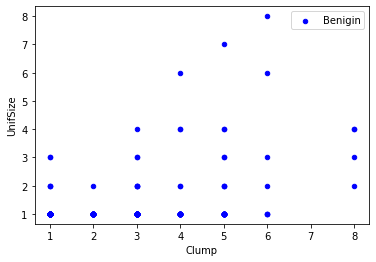

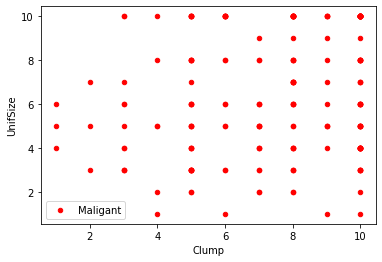

In [ ]:
print(benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benigin'))
print(maligant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Maligant'))

In [ ]:
df.dtypes
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
feature_df =df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]

In [ ]:
X=feature_df
Y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)


In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,Y_train)


SVC(C=2, gamma='auto', kernel='linear')

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(Y_test,y_pred)


'              precision    recall  f1-score   support\n\n           2       0.96      0.97      0.97       116\n           4       0.94      0.91      0.93        55\n\n    accuracy                           0.95       171\n   macro avg       0.95      0.94      0.95       171\nweighted avg       0.95      0.95      0.95       171\n'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)



array([[113,   3],
       [  5,  50]])